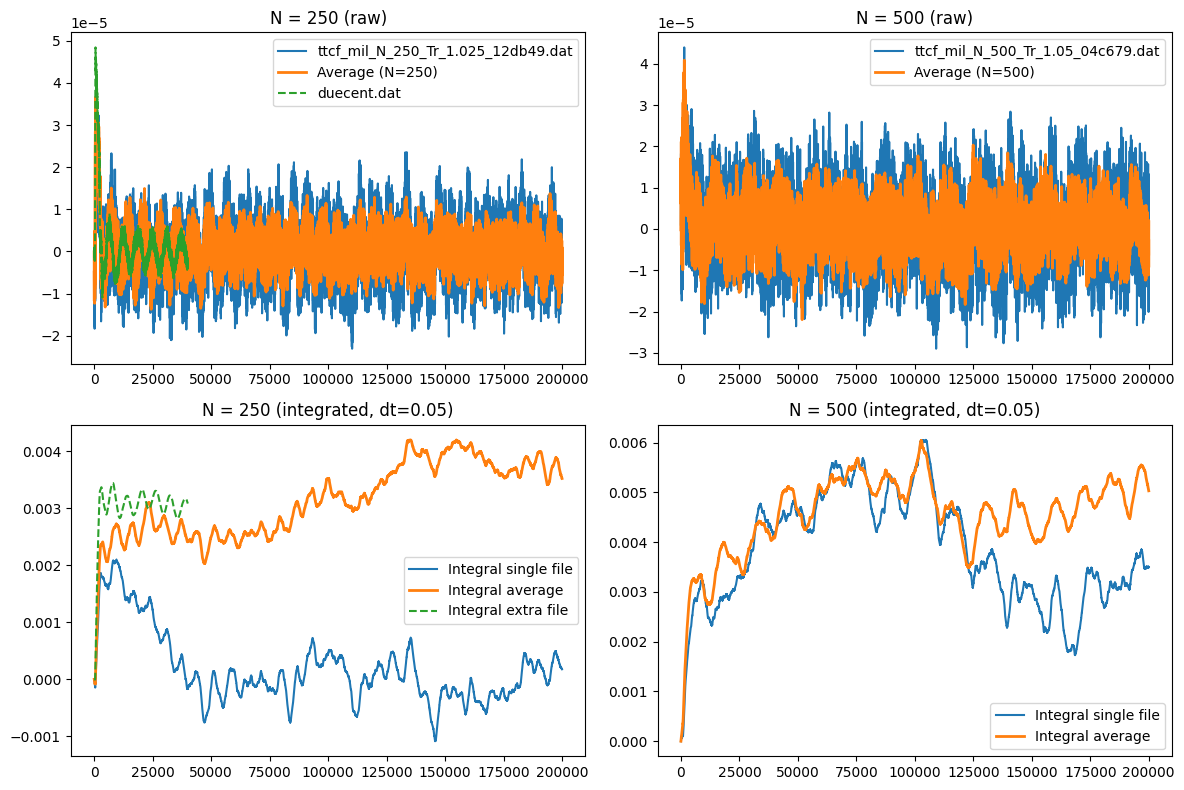

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import os

# --- Parameters ---
target_len = 200000
dt = 0.05
extra_file = "/home/dcarbone/catene/test_generation/duecent.dat"

# --- Get all .dat files ---
files = sorted(glob.glob("ttcf_mil_N_*.dat"))

# Helper to extract N from filename
def extract_N(fname):
    match = re.search(r"N_(\d+)_", fname)
    return int(match.group(1)) if match else None

# Group files by N
files_250 = [f for f in files if extract_N(f) == 250]
files_500 = [f for f in files if extract_N(f) == 500]

# Load and pad function
def load_and_pad(filelist, target_len=200000):
    data_list = []
    for f in filelist:
        d = np.loadtxt(f)
        if len(d) < target_len:
            d = np.pad(d, (0, target_len - len(d)))  # pad with zeros at end
        data_list.append(d[:target_len])
    return data_list

# Load and pad data
data_250 = load_and_pad(files_250, target_len)
data_500 = load_and_pad(files_500, target_len)

# Compute averages
mean_250 = np.mean(np.vstack(data_250), axis=0)
mean_500 = np.mean(np.vstack(data_500), axis=0)

# Choose representative file (first one)
single_250 = data_250[0]
single_500 = data_500[0]

# Load and pad the extra file
extra_250 = np.loadtxt(extra_file)
if len(extra_250) < target_len:
    extra_250 = np.pad(extra_250, (0, target_len - len(extra_250)))
extra_250 = extra_250[::5]

# Compute integrals
int_250_single = np.cumsum(single_250) * dt
int_250_mean = np.cumsum(mean_250) * dt
int_250_extra = np.cumsum(extra_250) * dt

int_500_single = np.cumsum(single_500) * dt
int_500_mean = np.cumsum(mean_500) * dt

# --- Plot ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# --- N = 250 raw ---
axes[0, 0].plot(single_250, label=os.path.basename(files_250[0]))
axes[0, 0].plot(mean_250, label='Average (N=250)', linewidth=2)
axes[0, 0].plot(extra_250, label=os.path.basename(extra_file), linestyle='--')
axes[0, 0].set_title('N = 250 (raw)')
axes[0, 0].legend()

# --- N = 250 integrated ---
axes[1, 0].plot(int_250_single, label='Integral single file')
axes[1, 0].plot(int_250_mean, label='Integral average', linewidth=2)
axes[1, 0].plot(int_250_extra, label='Integral extra file', linestyle='--')
axes[1, 0].set_title('N = 250 (integrated, dt=0.05)')
axes[1, 0].legend()

# --- N = 500 raw ---
axes[0, 1].plot(single_500, label=os.path.basename(files_500[0]))
axes[0, 1].plot(mean_500, label='Average (N=500)', linewidth=2)
axes[0, 1].set_title('N = 500 (raw)')
axes[0, 1].legend()

# --- N = 500 integrated ---
axes[1, 1].plot(int_500_single, label='Integral single file')
axes[1, 1].plot(int_500_mean, label='Integral average', linewidth=2)
axes[1, 1].set_title('N = 500 (integrated, dt=0.05)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()